In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns


# Correct paths for the data files on my local machine
mouse_metadata_path = r"C:\Users\s.lokuhewage\Challenge 05\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\s.lokuhewage\Challenge 05\Pymaceuticals\data\Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the first few rows of both DataFrames to understand the structure
mouse_metadata.head(), study_results.head()  

(  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
 0     k403     Ramicane    Male          21          16
 1     s185    Capomulin  Female           3          17
 2     x401    Capomulin  Female          16          15
 3     m601    Capomulin    Male          22          17
 4     g791     Ramicane    Male          11          16,
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
 0     b128          0                45.0                 0
 1     f932          0                45.0                 0
 2     g107          0                45.0                 0
 3     a457          0                45.0                 0
 4     c819          0                45.0                 0)

In [2]:
# Merge the two DataFrames on 'Mouse ID'
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the first few rows of the merged DataFrame
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Check the number of unique mice in the dataset
num_mice = merged_df['Mouse ID'].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract unique Mouse IDs from the duplicates and convert to a NumPy array
duplicate_mouse_ids = np.unique(duplicate_mice['Mouse ID'].values)

# Display the result as a NumPy array with type information
print("Duplicate Mouse IDs:")
print(repr(duplicate_mouse_ids))

Duplicate Mouse IDs:
array(['g989'], dtype=object)


In [6]:
# Remove all rows where Mouse ID is 'g989'
clean_df_no_duplicates = merged_df[merged_df['Mouse ID'] != 'g989']

# Display the first few rows of the clean DataFrame
clean_df_no_duplicates.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Count the unique Mouse IDs in the cleaned DataFrame
num_mice_clean = clean_df_no_duplicates['Mouse ID'].nunique()

# Display the number of unique mice
print(f'The number of unique mice in the cleaned DataFrame is: {num_mice_clean}')

The number of unique mice in the cleaned DataFrame is: 248


In [8]:
# Group by 'Drug Regimen' and calculate the required summary statistics for 'Tumor Volume (mm3)'
summary_stats = merged_df.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the resulting DataFrame
summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate the summary statistics for tumor volume using the aggregation method
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

# Create a MultiIndex for the column headers
summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], 
                                                    ['mean', 'median', 'var', 'std', 'sem']])

# Display the summary statistics with the required format
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

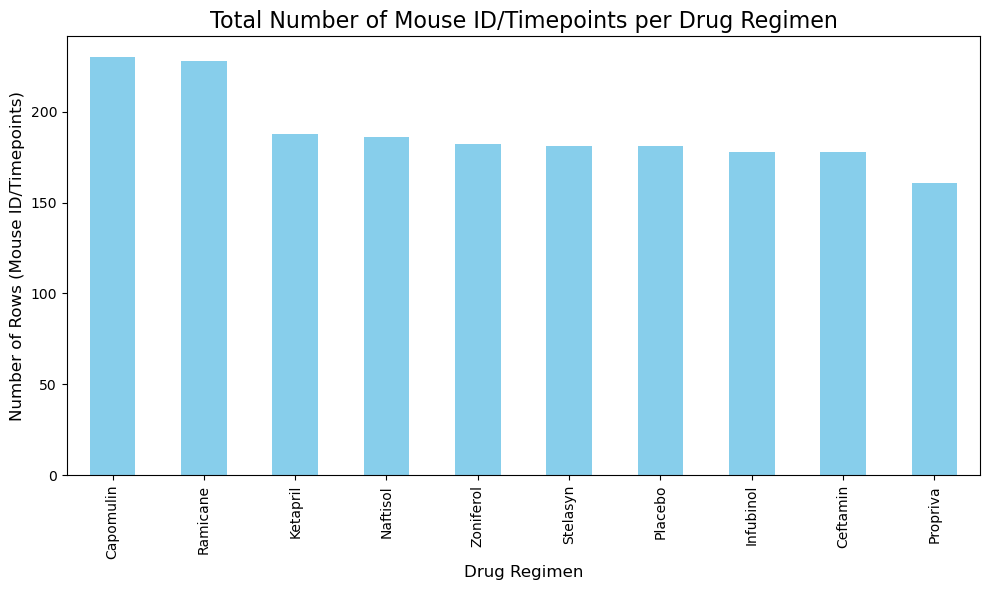

In [10]:
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each regimen
regimen_counts = merged_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10,6))

# Adding labels and title
plt.title('Total Number of Mouse ID/Timepoints per Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


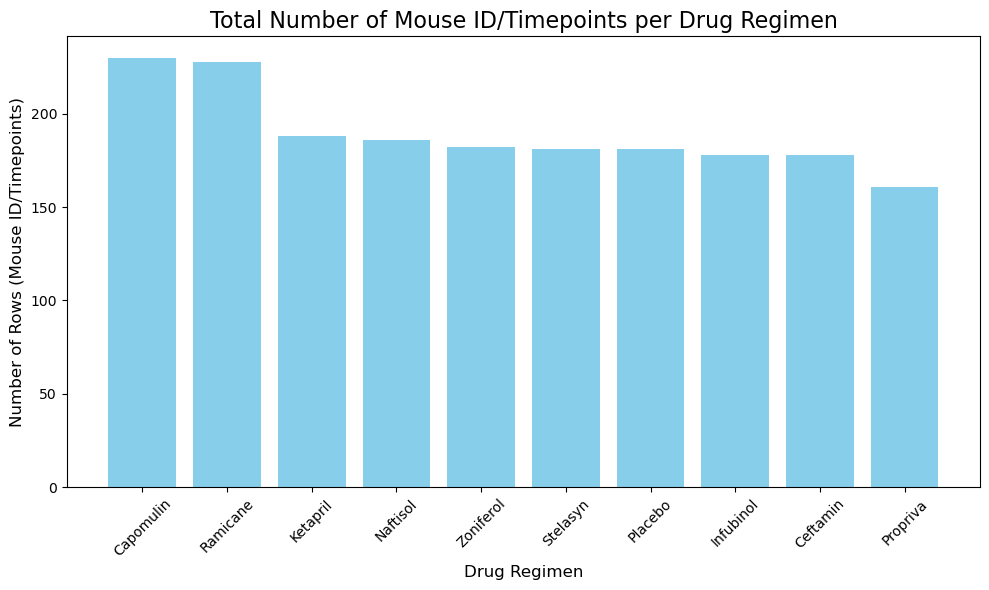

In [11]:
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each regimen
regimen_counts = merged_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Add labels and title
plt.title('Total Number of Mouse ID/Timepoints per Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

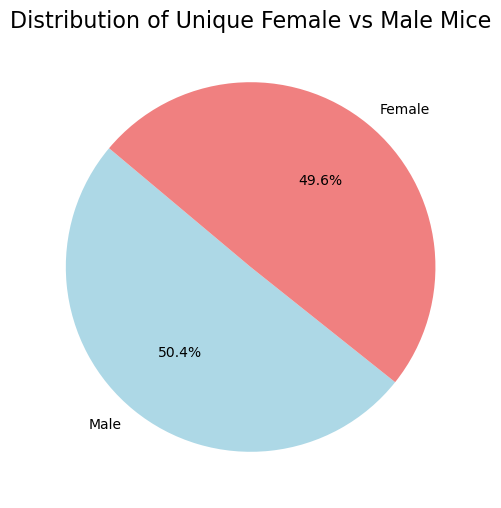

In [12]:
# Extract unique mice by 'Mouse ID' and 'Sex'
unique_mice = clean_df_no_duplicates.drop_duplicates(subset=['Mouse ID'])

# Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using Pandas
gender_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['lightblue', 'lightcoral'], startangle=140, legend=False)

# Add a title to the pie chart
plt.title('Distribution of Unique Female vs Male Mice', fontsize=16)

# Show the plot
plt.ylabel('')  # Remove the default y-axis label
plt.show()


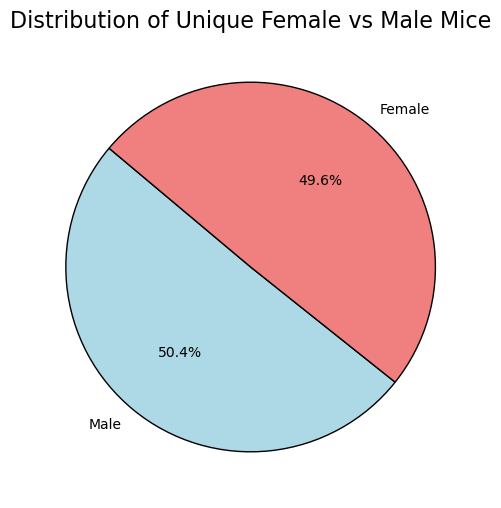

In [13]:
# Extract unique mice by 'Mouse ID' and 'Sex'
unique_mice = clean_df_no_duplicates.drop_duplicates(subset=['Mouse ID'])

# Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title to the pie chart
plt.title('Distribution of Unique Female vs Male Mice', fontsize=16)

# Show the plot
plt.show()

In [14]:
# Filter the DataFrame for the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_data = clean_df_no_duplicates[clean_df_no_duplicates['Drug Regimen'].isin(treatments)]

# Get the last (greatest) timepoint for each mouse
max_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the resulting DataFrame
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# List of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to hold tumor volume data for each treatment
tumor_vol_data = {}

# Loop through each treatment
for treatment in treatments:
    # Locate the rows for each drug regimen and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the subset to the dictionary
    tumor_vol_data[treatment] = tumor_volumes
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the bounds to identify outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


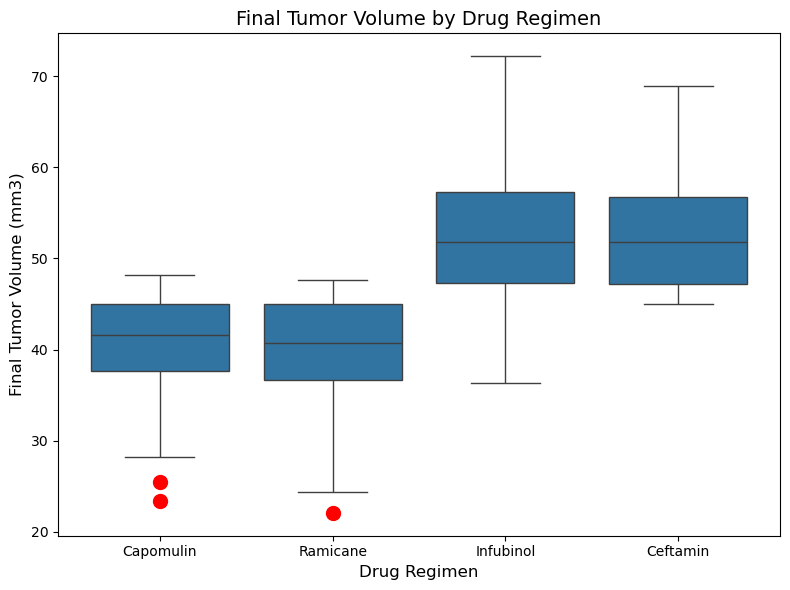

In [16]:
# Define the treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to only include the treatments of interest
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_df, order=treatments)

# Highlight the potential outliers
for treatment in treatments:
    tumor_volumes = filtered_df.loc[filtered_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Highlight the outliers
    plt.scatter([treatment] * len(outliers), outliers, color='red', s=100, zorder=3)

# Adding title and labels
plt.title('Final Tumor Volume by Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



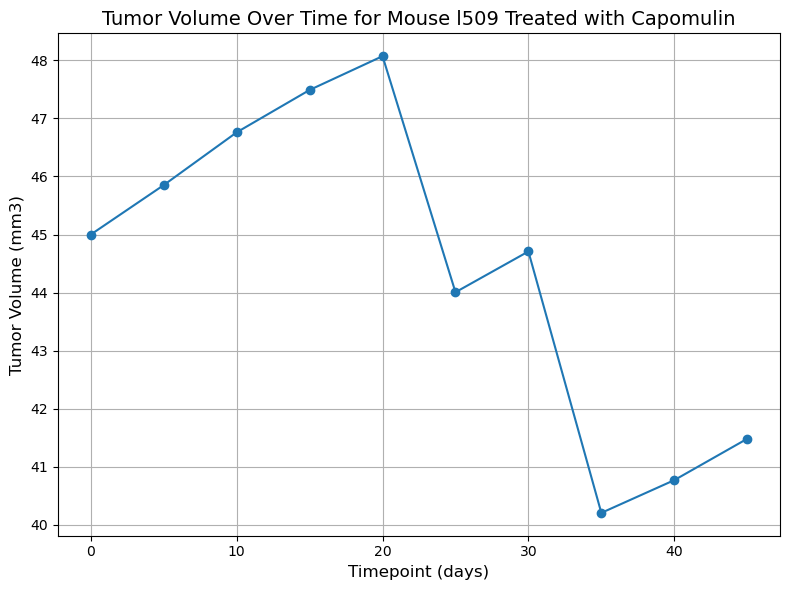

In [17]:
# Filter the DataFrame for the Capomulin regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Select a specific mouse treated with Capomulin (use Mouse ID 'l509' as an example)
mouse_id = 'l509'
single_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point for this mouse
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], marker='o')

# Adding title and labels
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin', fontsize=14)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


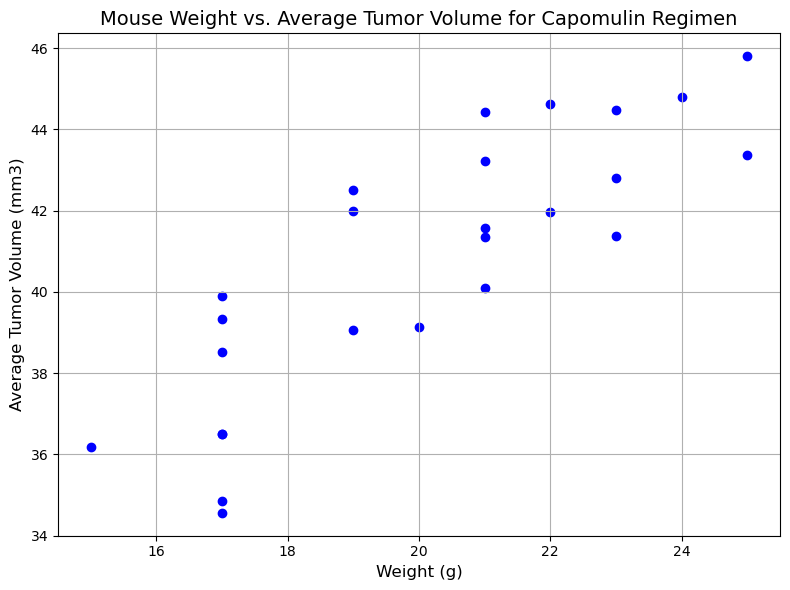

In [18]:
# Filter the DataFrame for the Capomulin regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge this data with the original Capomulin DataFrame to get the corresponding mouse weights
merged_capomulin_df = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates().merge(
    avg_tumor_volume, on='Mouse ID'
)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'], marker='o', color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



The correlation coefficient between mouse weight and average tumor volume is: 0.84


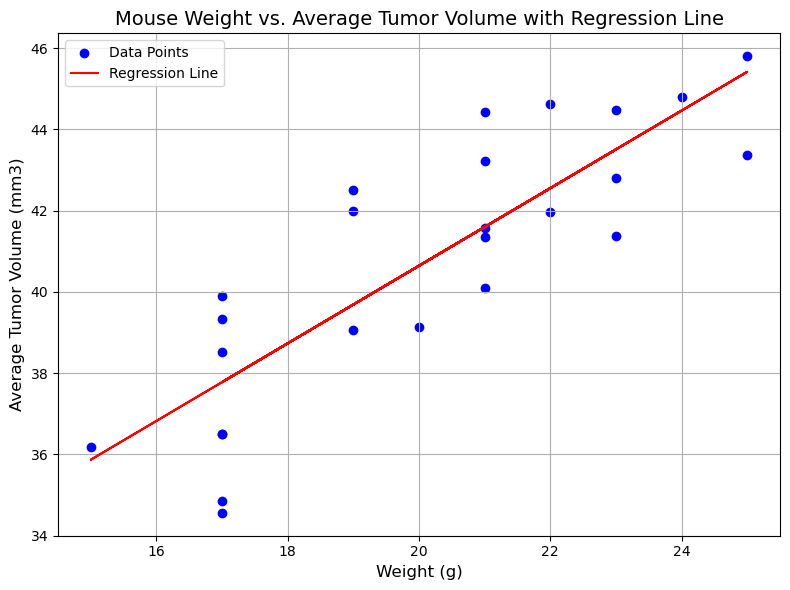

In [20]:

from scipy.stats import pearsonr

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation, _ = pearsonr(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.2f}")



from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'])

# Calculate regression line values
regress_values = merged_capomulin_df['Weight (g)'] * slope + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'], marker='o', color='blue', label='Data Points')
plt.plot(merged_capomulin_df['Weight (g)'], regress_values, color='red', label='Regression Line')

# Add labels, title, and legend
plt.title('Mouse Weight vs. Average Tumor Volume with Regression Line', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

